In [93]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import wbgapi as wb
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.linear_model import RidgeCV
from sklearn import linear_model

In [129]:

WBData = wb.data.DataFrame(['EN.ATM.CO2E.KT', 'NY.GDP.MKTP.PP.KD' ,  'SP.POP.TOTL', 'EG.FEC.RNEW.ZS', 'SP.URB.TOTL.IN.ZS', 'NV.MNF.TECH.ZS.UN', 'NE.TRD.GNFS.ZS'], [ "ARG","ARM","AUS","AUT","BLR","BEL","BRA","BGR","CAN","CHL","CHN","COL","HRV","CZE","DNK","EST","FIN","FRA","GEO","DEU","GRC","HUN","ISL","IND","IRL","ISR","ITA","JPN","KAZ","KOR","LVA","LTU","MYS","MEX","MDA","NLD","NZL","NOR","PAN","PER","POL","PRT","ROU","RUS","SRB","SGP","SVK","SVN","ZAF","ESP","SWE","CHE","TUR","UKR","GBR","USA"
 ], range(1994,2022),   columns='series');
 
 ## I have removed the indexes as they won't play any role in the model
WBData = WBData.reset_index(drop=True)
WBData.head()

## Renaming Columns

WBData.columns = ['Renewable energy consumption', 'C02 emmissions', 'Trade (% of GDP)', 'Medium an high-tech manufacturing value added', 'GDP per capita, PPP', 'Population', 'Urban Population (% of total population)']


## Our response here is C02 emmisions 


In [130]:

print(WBData.isnull().sum())

## There are some null entries in the data. I am going to remove them but we'll have to ask the professor if that's the right thing to do for the project

WBData = WBData.dropna()




Renewable energy consumption                     112
C02 emmissions                                   112
Trade (% of GDP)                                  14
Medium an high-tech manufacturing value added    112
GDP per capita, PPP                               12
Population                                         0
Urban Population (% of total population)           0
dtype: int64


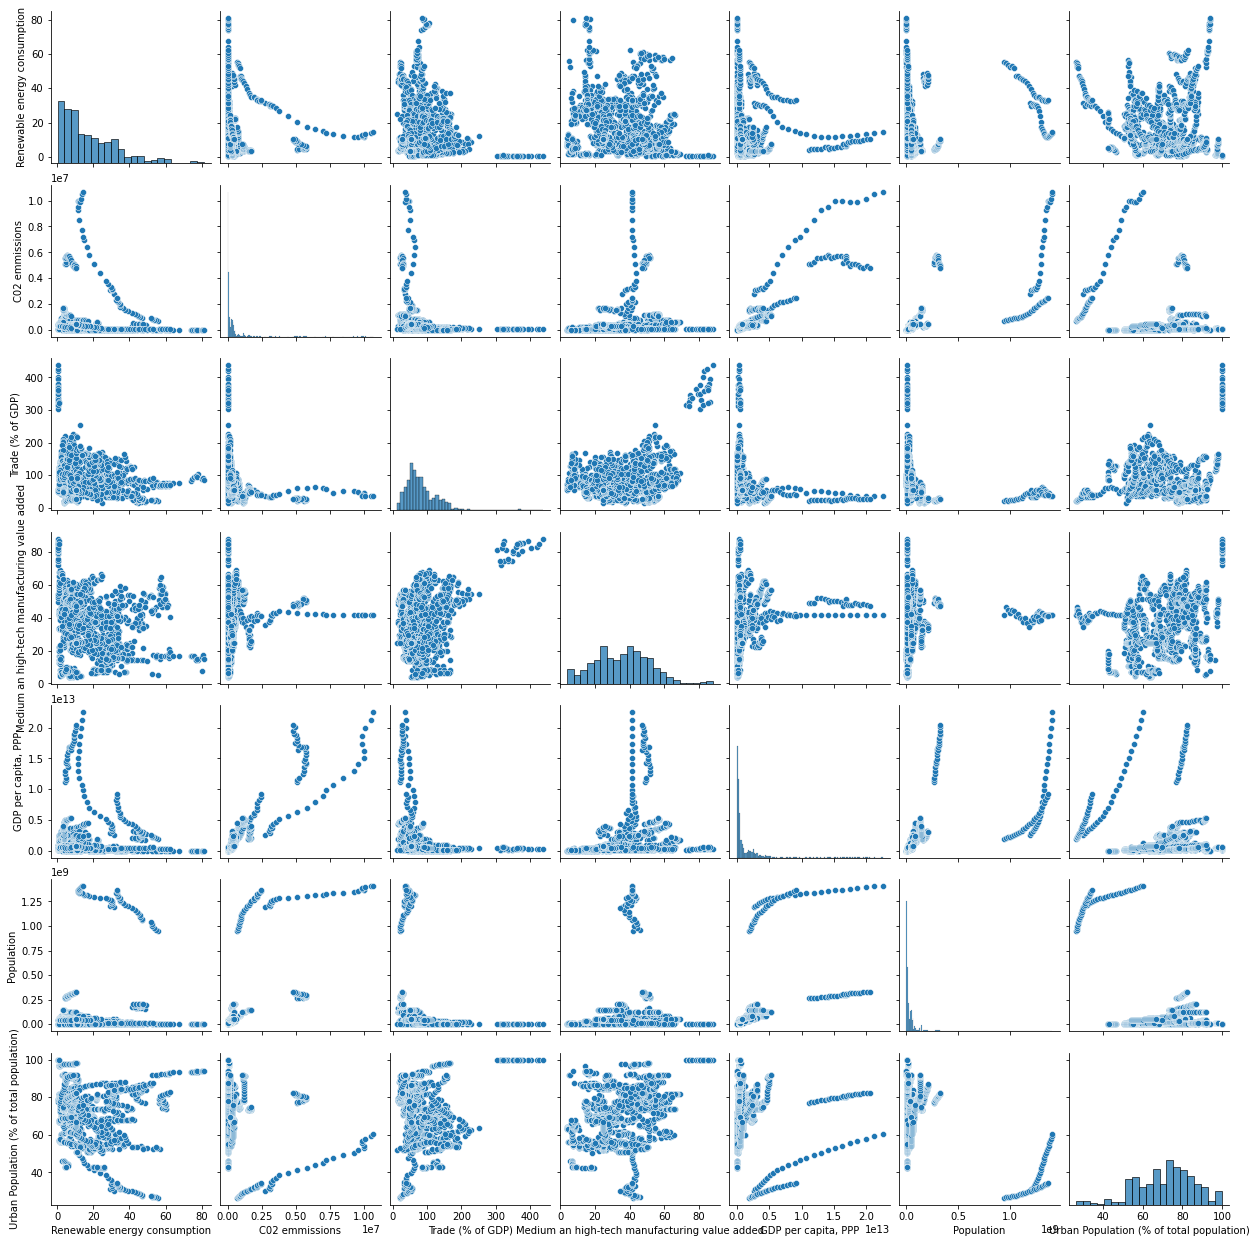

In [86]:
sns.pairplot(WBData)

## Here is the pairplot, the clustering would be the indexes that we have removed. 


In [132]:
Y = WBData["C02 emmissions"]
X = WBData.drop(["C02 emmissions"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1000)


,Renewable energy consumption,C02 emmissions,Trade (% of GDP),Medium an high-tech manufacturing value added,"GDP per capita, PPP",Population,Urban Population (% of total population)
0,-0.474378,-0.266725,-1.247988,-0.381930,-0.246549,-0.188500,1.147284
1,-0.443598,-0.265905,-1.217990,-0.534233,-0.252947,-0.186663,1.161563
2,-0.509791,-0.257825,-1.186196,-0.448727,-0.240872,-0.184858,1.175701
3,-0.457088,-0.254839,-1.152668,-0.296937,-0.222171,-0.183083,1.189560
4,-0.434577,-0.249360,-1.152414,-0.330805,-0.212574,-0.181331,1.203208
